# 모듈 불러오기

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
 
from scipy import stats

%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

import statsmodels.formula.api as smf
from statsmodels.api import qqplot

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

import seaborn as sns
from statsmodels.api import qqplot, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# 한국어 패치
matplotlib.rc('font',family='Noto Sans CJK JP')
matplotlib.rc('axes',unicode_minus=False)



In [3]:
merge = pd.read_csv("/home/piai/BigData/Project/빅데이터_프로젝트/B4_의료/merge_df.csv", encoding = 'utf-8')
merge.head()

,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,1052PT,10.5,2,44.0,0.0,0,0,0,0,0,...,0,49.7,27.6,1.2,0,NaN,2155.3,4,Middle,0
1,1056PT,46.7,3,21.0,1.0,0,0,0,0,0,...,0,36.3,4.5,7.3,0,NaN,2143.1,4,Middle,0
2,1093PT,30.1,3,13.0,0.0,0,0,0,0,0,...,0,41.3,17.4,13.4,0,NaN,1868.7,4,Down,0
3,1687PT,45.4,3,NaN,0.0,0,0,0,0,0,...,0,45.7,16.6,20.1,0,NaN,1851.2,5,Middle,0
4,1674PT,52.2,1,31.0,0.0,1,0,1,0,0,...,0,54.5,16.7,2.9,0,NaN,2419.1,2,Up,0


In [4]:
merge.describe()

,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,빈혈여부,...,MF + ES,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추전방위증
count,1894.000000,1894.000000,462.000000,1843.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,...,1894.000000,1894.000000,1890.000000,1890.000000,1893.000000,1894.000000,998.000000,1893.000000,1894.000000,1894.000000
mean,39.270750,2.295671,31.142857,0.049919,0.020063,0.130940,0.302534,0.062830,0.004224,0.024287,...,2096.421600,0.247096,46.593651,16.329841,15.287934,0.056494,-1.507325,1989.788774,4.430834,0.032207
std,13.675874,0.996143,10.131304,0.217836,0.140254,0.337424,0.638461,0.242721,0.064871,0.153980,...,472.834488,0.661506,22.736211,8.421322,10.426397,0.230935,0.495867,314.478436,3.595680,0.176596
min,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1016.800000,0.000000,11.900000,-10.600000,-27.400000,0.000000,-2.840000,1145.800000,1.000000,0.000000
25%,30.700000,1.000000,24.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1765.285000,0.000000,38.700000,10.500000,8.800000,0.000000,-1.820000,1777.000000,4.000000,0.000000
50%,40.200000,2.000000,31.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2056.500000,0.000000,45.100000,15.700000,14.500000,0.000000,-1.520000,1985.500000,4.000000,0.000000
75%,48.600000,3.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2374.350000,0.000000,52.000000,21.400000,21.100000,0.000000,-1.202500,2178.500000,4.000000,0.000000
max,89.000000,5.000000,68.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,...,5569.000000,3.000000,559.000000,48.700000,165.000000,1.000000,1.700000,3214.200000,45.000000,1.000000


In [5]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 51 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   환자ID                    1894 non-null   object 
 1   Large Lymphocyte        1894 non-null   float64
 2   Location of herniation  1894 non-null   int64  
 3   ODI                     462 non-null    float64
 4   가족력                     1843 non-null   float64
 5   간질성폐질환                  1894 non-null   int64  
 6   고혈압여부                   1894 non-null   int64  
 7   과거수술횟수                  1894 non-null   int64  
 8   당뇨여부                    1894 non-null   int64  
 9   말초동맥질환여부                1894 non-null   int64  
 10  빈혈여부                    1894 non-null   int64  
 11  성별                      1894 non-null   int64  
 12  스테로이드치료                 1894 non-null   int64  
 13  신부전여부                   1894 non-null   int64  
 14  신장                      1894 non-null   

In [6]:
merge.isnull().sum()

환자ID                         0
Large Lymphocyte             0
Location of herniation       0
ODI                       1432
가족력                         51
간질성폐질환                       0
고혈압여부                        0
과거수술횟수                       0
당뇨여부                         0
말초동맥질환여부                     0
빈혈여부                         0
성별                           0
스테로이드치료                      0
신부전여부                        0
신장                           0
심혈관질환                        0
암발병여부                        0
연령                           0
우울증여부                        0
입원기간                         0
종양진행여부                       0
직업                         415
체중                           0
혈전합병증여부                      0
흡연여부                         0
통증기간(월)                      4
입원일자                         0
퇴원일자                         0
수술기법                        81
수술시간                        54
수술실패여부                       0
재발여부                         0
헤모글로빈수치 

# 데이터 정제

- 환자 ID 제거, 혈액형 삭제

In [7]:
merge.drop(['환자ID','혈액형'], axis=1, inplace=True)

In [8]:
merge

,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,빈혈여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,10.5,2,44.0,0.0,0,0,0,0,0,0,...,0,49.7,27.6,1.2,0,NaN,2155.30,4,Middle,0
1,46.7,3,21.0,1.0,0,0,0,0,0,0,...,0,36.3,4.5,7.3,0,NaN,2143.10,4,Middle,0
2,30.1,3,13.0,0.0,0,0,0,0,0,0,...,0,41.3,17.4,13.4,0,NaN,1868.70,4,Down,0
3,45.4,3,NaN,0.0,0,0,0,0,0,0,...,0,45.7,16.6,20.1,0,NaN,1851.20,5,Middle,0
4,52.2,1,31.0,0.0,1,0,1,0,0,0,...,0,54.5,16.7,2.9,0,NaN,2419.10,2,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,23.5,3,55.0,0.0,0,0,0,0,0,0,...,0,27.7,9.1,10.7,0,-1.69,1777.50,4,Middle,0
1890,31.4,3,NaN,0.0,0,0,0,0,0,0,...,1,34.6,14.1,20.8,0,-2.06,1219.00,4,Middle,0
1891,24.9,1,NaN,0.0,0,1,0,0,0,0,...,0,35.6,10.7,8.4,0,-1.16,2324.83,4,Middle,1
1892,45.8,4,NaN,0.0,0,0,0,0,0,0,...,0,30.7,2.3,20.4,0,-1.93,2203.83,4,Middle,0


### 결측치 처리

In [9]:
# ODI 0 채우기
merge.ODI.fillna(0, inplace=True)
merge.ODI.isnull().sum()

0

- ODI 결측치 1432개 0으로 채움 -> 대이터에 '0'이 없어서 결측치 표시

In [10]:
# 가족력 drop
merge.dropna(subset=['가족력'],inplace = True)
merge.가족력.isnull().sum()

0

- 가족력 결측치 51개 제거

In [11]:
#헤모글로빈 성별 기준 평균값

헤모글로빈수치_1 = merge[merge['성별'] == 1]['헤모글로빈수치'].mean()
헤모글로빈수치_2 = merge[merge['성별'] == 2]['헤모글로빈수치'].mean()
print(헤모글로빈수치_1)
print(헤모글로빈수치_2)

14.976942003514937
13.922613636363637


In [12]:
# 헤모글로빈수치 (성별 기준 평균 대체 (1 : 15, 2 : 13.9. 결측치는 1)
merge.헤모글로빈수치.fillna(14.976942003514937, inplace=True)
merge.헤모글로빈수치.isnull().sum()

0

 - 헤모글로빈 결측치 1개 성별별 평균으로 채움

In [13]:
# 통증기간
merge['통증기간(월)'].fillna(merge['통증기간(월)'].mean(skipna= True), inplace = True)
merge['통증기간(월)'].isnull().sum()

0

- 통증기간 4개 평균으로 채움 (평균 = 5.879841269) 

In [14]:
# 가족력 drop
merge.dropna(subset=['디스크단면적'],inplace = True)
merge.디스크단면적.isnull().sum()

0

- 디스크단멱적 결측치 1개 제거

In [15]:
# 수술시간
merge['수술시간'].fillna(merge['수술시간'].mean(skipna= True), inplace = True)
merge['수술시간'].isnull().sum()

0

- 수술시간 결측치 4개 평균으로 대체

In [16]:
#수술기법 
merge["수술기법"].fillna("기타", inplace = True)

- 수술기법 결측치 81개 기타로 처리

In [17]:
#직업
merge["직업"].fillna("기타", inplace = True)

- 직업 결측치 401개 기타로 처리

In [18]:
# 지방축적도
merge.dropna(subset=['지방축적도'],inplace = True)
merge.지방축적도.isnull().sum()

0

- 지방축적도 결측치 3개 제거

In [19]:
# PI
merge.dropna(subset=['PI'],inplace = True)
merge.PI.isnull().sum()

0

- PI 결측치 4개 제거

In [20]:
# PT
merge.dropna(subset=['PT'],inplace = True)
merge.PT.isnull().sum()

0

- PT 결측치 4개 제거

- Seg Angle(raw) 결측치 1개 대기

In [21]:
merge.골밀도.fillna(100, inplace=True)
merge.골밀도.isnull().sum()

0

- 골밀도 결측치 841개
- 결측치와 결측치가 아닌 데이터는 연령별 유의미한 차이가 있다
- 구분하기 위해 결측치 값 100 대체

In [22]:
merge.isnull().sum()

Large Lymphocyte          0
Location of herniation    0
ODI                       0
가족력                       0
간질성폐질환                    0
고혈압여부                     0
과거수술횟수                    0
당뇨여부                      0
말초동맥질환여부                  0
빈혈여부                      0
성별                        0
스테로이드치료                   0
신부전여부                     0
신장                        0
심혈관질환                     0
암발병여부                     0
연령                        0
우울증여부                     0
입원기간                      0
종양진행여부                    0
직업                        0
체중                        0
혈전합병증여부                   0
흡연여부                      0
통증기간(월)                   0
입원일자                      0
퇴원일자                      0
수술기법                      0
수술시간                      0
수술실패여부                    0
재발여부                      0
헤모글로빈수치                   0
환자통증정도                    0
수술일자                      0
전방디스크높이(mm)               0
후방디스크높이(mm)         

### 이상치 처리

- 대림프구 기준이 7보다 큰 값이라서 밑에거 다 제거

In [23]:
merge = merge[merge['Large Lymphocyte'] >= 7]

In [24]:
merge[merge['Large Lymphocyte'] < 7]

,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,빈혈여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증


- 헤모글로빈수치 (7~19.38) 이상치 없음 

- 통증기간(월) 360개월 있지만, FBSS로 예상되어 이상치 없다고 판단

In [25]:
merge[merge['통증기간(월)'] >= 300]

,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,빈혈여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
1632,51.6,3,0.0,0.0,0,0,0,0,0,0,...,0,36.1,2.6,22.0,0,100.0,2197.0,4,Down,0


- 입원기간 이상치 제거
- 파생변수 

In [26]:
merge['입원일자'] = pd.to_datetime(merge['입원일자'], format='%Y-%m-%d')
merge['퇴원일자'] = pd.to_datetime(merge['퇴원일자'], format='%Y-%m-%d')

In [27]:
merge['최근입원기간'] = merge['퇴원일자'] - merge['입원일자']

In [28]:
merge

,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,빈혈여부,...,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증,최근입원기간
0,10.5,2,44.0,0.0,0,0,0,0,0,0,...,49.7,27.6,1.2,0,100.00,2155.30,4,Middle,0,1 days
1,46.7,3,21.0,1.0,0,0,0,0,0,0,...,36.3,4.5,7.3,0,100.00,2143.10,4,Middle,0,3 days
2,30.1,3,13.0,0.0,0,0,0,0,0,0,...,41.3,17.4,13.4,0,100.00,1868.70,4,Down,0,0 days
3,45.4,3,0.0,0.0,0,0,0,0,0,0,...,45.7,16.6,20.1,0,100.00,1851.20,5,Middle,0,3 days
4,52.2,1,31.0,0.0,1,0,1,0,0,0,...,54.5,16.7,2.9,0,100.00,2419.10,2,Up,0,1 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,23.5,3,55.0,0.0,0,0,0,0,0,0,...,27.7,9.1,10.7,0,-1.69,1777.50,4,Middle,0,4 days
1890,31.4,3,0.0,0.0,0,0,0,0,0,0,...,34.6,14.1,20.8,0,-2.06,1219.00,4,Middle,0,4 days
1891,24.9,1,0.0,0.0,0,1,0,0,0,0,...,35.6,10.7,8.4,0,-1.16,2324.83,4,Middle,1,2 days
1892,45.8,4,0.0,0.0,0,0,0,0,0,0,...,30.7,2.3,20.4,0,-1.93,2203.83,4,Middle,0,2 days


In [29]:
merge['누적입원기간'] = merge['입원기간'] * 30

In [30]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1791 entries, 0 to 1893
Data columns (total 51 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   Large Lymphocyte        1791 non-null   float64        
 1   Location of herniation  1791 non-null   int64          
 2   ODI                     1791 non-null   float64        
 3   가족력                     1791 non-null   float64        
 4   간질성폐질환                  1791 non-null   int64          
 5   고혈압여부                   1791 non-null   int64          
 6   과거수술횟수                  1791 non-null   int64          
 7   당뇨여부                    1791 non-null   int64          
 8   말초동맥질환여부                1791 non-null   int64          
 9   빈혈여부                    1791 non-null   int64          
 10  성별                      1791 non-null   int64          
 11  스테로이드치료                 1791 non-null   int64          
 12  신부전여부                   1791 non-n

In [31]:
merge["최근입원기간"] = merge["최근입원기간"].astype(str)
merge["최근입원기간"] = merge["최근입원기간"].str.replace(' days','')
merge["최근입원기간"] = merge["최근입원기간"].astype(int)

In [32]:
merge['입원기간이상치'] = (merge['최근입원기간'] <= merge['누적입원기간'])

In [33]:
merge = merge[merge['입원기간이상치'] == True]

In [34]:
merge.drop(['입원기간이상치'], axis=1, inplace=True)

In [35]:
merge

,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,빈혈여부,...,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증,최근입원기간,누적입원기간
0,10.5,2,44.0,0.0,0,0,0,0,0,0,...,27.6,1.2,0,100.00,2155.30,4,Middle,0,1,30
1,46.7,3,21.0,1.0,0,0,0,0,0,0,...,4.5,7.3,0,100.00,2143.10,4,Middle,0,3,30
2,30.1,3,13.0,0.0,0,0,0,0,0,0,...,17.4,13.4,0,100.00,1868.70,4,Down,0,0,30
3,45.4,3,0.0,0.0,0,0,0,0,0,0,...,16.6,20.1,0,100.00,1851.20,5,Middle,0,3,30
4,52.2,1,31.0,0.0,1,0,1,0,0,0,...,16.7,2.9,0,100.00,2419.10,2,Up,0,1,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,23.5,3,55.0,0.0,0,0,0,0,0,0,...,9.1,10.7,0,-1.69,1777.50,4,Middle,0,4,30
1890,31.4,3,0.0,0.0,0,0,0,0,0,0,...,14.1,20.8,0,-2.06,1219.00,4,Middle,0,4,30
1891,24.9,1,0.0,0.0,0,1,0,0,0,0,...,10.7,8.4,0,-1.16,2324.83,4,Middle,1,2,30
1892,45.8,4,0.0,0.0,0,0,0,0,0,0,...,2.3,20.4,0,-1.93,2203.83,4,Middle,0,2,30


- 수술일자 이상치
- 퇴원일자 이후 or 입원일자 이전에 수술한 경우 -> 없음

- 우울증 여부 이상치 : 0,1이외에 값 -> 2 하나 있음 -> 제거

In [36]:
merge['우울증여부'].value_counts()

0    1727
1      41
2       1
Name: 우울증여부, dtype: int64

In [37]:
merge = merge[merge["우울증여부"] != 2]
# 우울증여부의 이상치 제거(2)

In [38]:
merge['우울증여부'].value_counts()

0    1727
1      41
Name: 우울증여부, dtype: int64

- Seg Angle 대기

- 골밀도 대기 

- 디스크위치 : 7이상 제거 (근거 : 요추 수술이기에 L1~6만 유효)

In [39]:
merge = merge[merge['디스크위치'] < 7]

- 디스크단면적 대기

In [40]:
def age(var):
    if var <19:
        return '청소년'
    elif var < 30:
        return '청년'
    elif var < 50:
        return '중년'
    elif var < 65:
        return '장년'
    else:
        return '노년'

In [41]:
merge['연령대']=merge['연령'].apply(age)
merge['연령대'].value_counts()

중년     978
장년     333
청년     313
노년      86
청소년     35
Name: 연령대, dtype: int64

In [42]:
merge['BMI']=merge['체중']/(merge['신장']/100)**2
merge['BMI']=merge['BMI'].round(2)
merge['BMI'].astype('float')

0       24.77
1       23.66
2       21.71
3       23.66
4       27.94
        ...  
1889    24.54
1890    21.11
1891    20.96
1892    16.91
1893    22.16
Name: BMI, Length: 1745, dtype: float64

In [43]:
def bmi_seg(var):
    if var < 18.5:
        return '저체중'
    elif var < 25:
        return '정상'
    elif var < 30:
        return '과체중'
    else:
        return '비만'

merge['BMI'] = merge['BMI'].apply(bmi_seg)
merge['BMI'].value_counts()

정상     1290
과체중     366
비만       57
저체중      32
Name: BMI, dtype: int64

In [44]:
merge['입원기간'].value_counts()

1     1043
2      460
3      174
4       34
5        6
8        5
6        4
0        3
11       3
7        3
17       2
9        1
18       1
44       1
15       1
13       1
12       1
51       1
10       1
Name: 입원기간, dtype: int64

In [45]:
def month(var):
    if var==1:
        return '1개월'
    elif var==2:
        return '2개월'
    elif var==3:
        return '3개월'
    elif var==4:
        return '4개월 이상'

In [46]:
merge['입원기간']=merge['입원기간'].apply(month)
merge['입원기간'].value_counts()

1개월       1043
2개월        460
3개월        174
4개월 이상      34
Name: 입원기간, dtype: int64

In [47]:
def season(var):
    if var[5:7] in ['03', '04', '05']:
        return '봄'
    elif var[5:7] in ['06', '07', '08']:
        return '여름'
    elif var[5:7] in ['09', '10', '11']:
        return '가을'
    else:
        return '겨울'

In [48]:
merge['수술계절']=merge['수술일자'].apply(season)    
merge['수술계절'].value_counts()

겨울    588
봄     429
가을    395
여름    333
Name: 수술계절, dtype: int64

In [49]:
def month(var):
    return var[5:7]

In [50]:
merge['수술월']=merge['수술일자'].apply(month)

# 분석

## 시각화

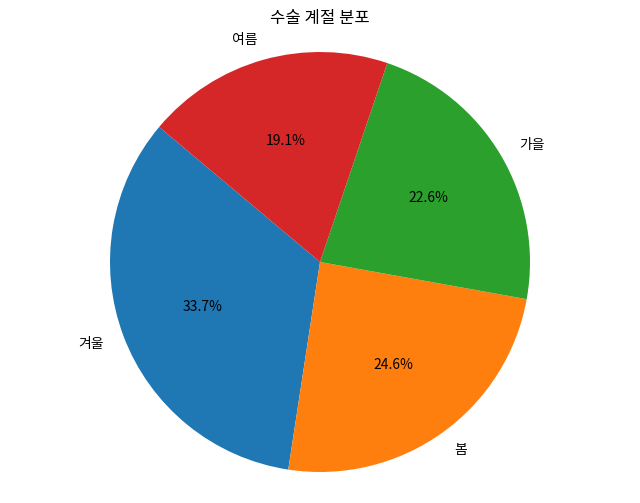

In [51]:
season_cnt=merge['수술계절'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(season_cnt, labels=season_cnt.index, autopct='%1.1f%%', startangle=140)
plt.title("수술 계절 분포")
plt.axis('equal')
plt.show()

In [52]:
from datetime import datetime

def days(var):
    # 날짜 문자열을 파싱하여 datetime 객체 생성
    date_string = var # 원하는 날짜를 입력하세요
    date_obj = datetime.strptime(date_string, '%Y-%m-%d')
    
    # 요일을 문자열로 얻기
    weekday_string = date_obj.strftime('%A')
    return weekday_string
merge['수술요일'] = merge['수술일자'].apply(days)
merge['수술요일']

0         Monday
1         Monday
2         Monday
3         Monday
4         Monday
          ...   
1889    Saturday
1890    Saturday
1891    Saturday
1892    Saturday
1893    Saturday
Name: 수술요일, Length: 1745, dtype: object

In [53]:
merge['입원일자']=merge['입원일자'].astype('str')
merge['입원요일'] = merge['입원일자'].apply(days)
merge['입원요일']

0          Sunday
1          Sunday
2          Monday
3          Sunday
4          Monday
          ...    
1889      Tuesday
1890      Tuesday
1891     Thursday
1892     Thursday
1893    Wednesday
Name: 입원요일, Length: 1745, dtype: object

In [54]:
merge['퇴원일자']=merge['퇴원일자'].astype('str')
merge['퇴원요일'] = merge['퇴원일자'].apply(days)
merge['퇴원요일']

0          Monday
1       Wednesday
2          Monday
3       Wednesday
4         Tuesday
          ...    
1889     Saturday
1890     Saturday
1891     Saturday
1892     Saturday
1893     Saturday
Name: 퇴원요일, Length: 1745, dtype: object

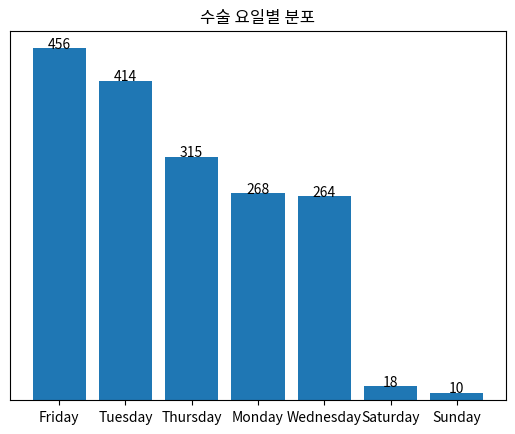

In [55]:
days_cnt=merge['수술요일'].value_counts()

plt.bar(days_cnt.index,days_cnt)
plt.title("수술 요일별 분포")
for i, count in enumerate(days_cnt):
    plt.text(i, count + 0.5, str(count), ha='center')
plt.yticks([])
plt.show()

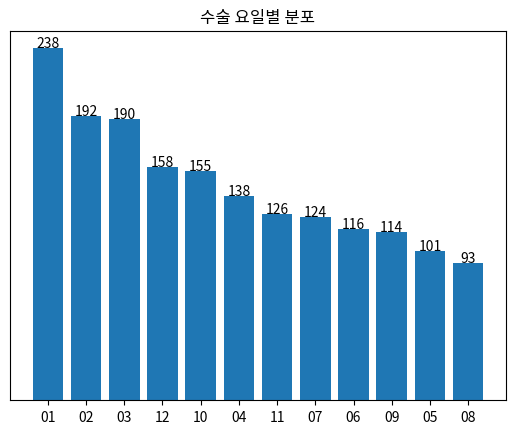

In [56]:
month_cnt=merge['수술월'].value_counts()

plt.bar(month_cnt.index,month_cnt)
plt.title("수술 요일별 분포")
for i, count in enumerate(month_cnt):
    plt.text(i, count + 0.5, str(count), ha='center')
plt.yticks([])
plt.show()

In [57]:
merge['수술년도']=merge['수술일자'].apply(lambda x: x[:4])

merge['수술년도'].value_counts()

2021    734
2022    176
2013    155
2014    118
2018     95
2011     94
2016     92
2019     76
2017     69
2015     60
2012     57
2020     19
Name: 수술년도, dtype: int64

In [58]:
merge[merge['직업']=='사무직']['수술요일'].value_counts()

Friday       107
Tuesday      102
Thursday      80
Monday        61
Wednesday     53
Saturday       6
Sunday         5
Name: 수술요일, dtype: int64

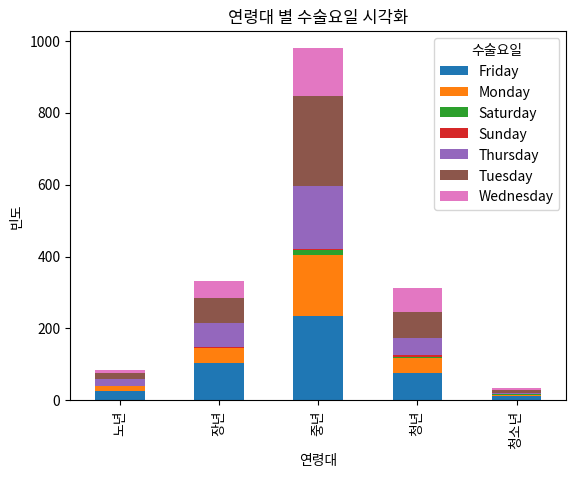

In [59]:
# 연령대 별 수술요일 빈도 계산
age_day_counts = merge.groupby(['연령대', '수술요일']).size().unstack()

# 막대 그래프 그리기
age_day_counts.plot(kind='bar', stacked=True)
plt.xlabel('연령대')
plt.ylabel('빈도')
plt.title('연령대 별 수술요일 시각화')

plt.show()

In [60]:
merge['직업'].value_counts()

사무직      414
기타       383
자영업      161
무직       149
학생       117
주부       107
군인        84
공무원       47
운수업       45
노동직       42
농업        38
의료직       35
사업가       35
교사        26
특수전문직     22
건설업       16
운동선수      14
예술가       10
Name: 직업, dtype: int64

In [61]:
merge[(merge['수술요일']=='Saturday') | (merge['수술요일']=='Sunday')]['수술년도'].value_counts()

2021    13
2013    12
2017     2
2018     1
Name: 수술년도, dtype: int64

In [62]:
merge[merge['직업']=='무직']['수술요일'].value_counts()

Friday       57
Tuesday      34
Thursday     29
Wednesday    18
Monday       11
Name: 수술요일, dtype: int64

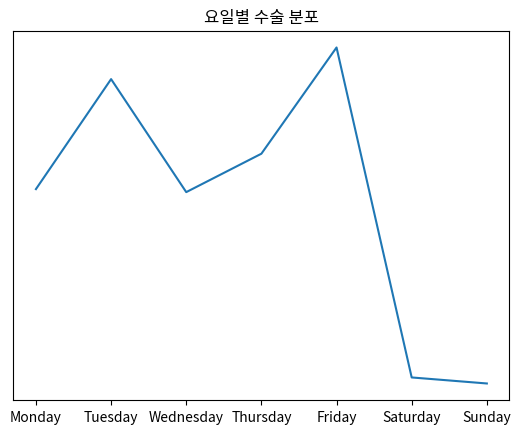

In [65]:
# 요일명 순서 정의
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# 요일별 수술 수 계산
weekday_counts = merge['수술요일'].value_counts()
weekday_pro=weekday_counts/weekday_counts.sum()
weekday_pro

# 차트 그리기
plt.plot(weekday_order, weekday_pro.loc[weekday_order])
plt.title('요일별 수술 분포')

# 수치 나타내기
# for i, count in enumerate(weekday_counts.loc[weekday_order]):
#     plt.text(i, count + 0.5, str(count), ha='center')

plt.yticks([])  # y축 숨기기
plt.show()

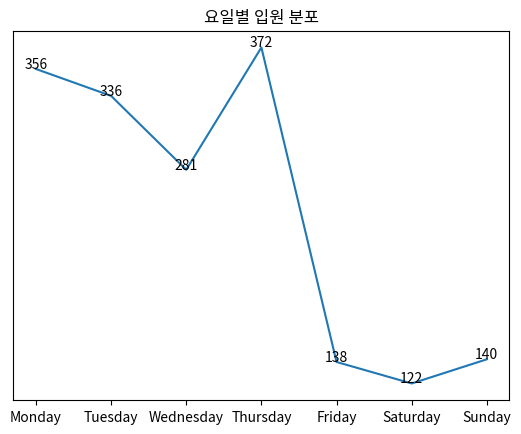

In [ ]:
# 요일명 순서 정의
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# 요일별 수술 수 계산
weekday_counts = merge['입원요일'].value_counts()

# 차트 그리기
plt.plot(weekday_order, weekday_counts.loc[weekday_order])
plt.title('요일별 입원 분포')

# 수치 나타내기
for i, count in enumerate(weekday_counts.loc[weekday_order]):
    plt.text(i, count + 0.5, str(count), ha='center')

plt.yticks([])  # y축 숨기기
plt.show()

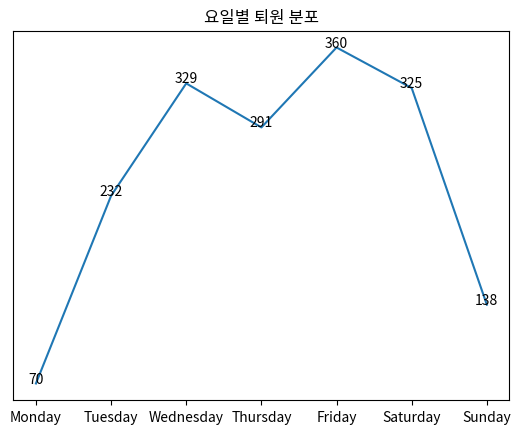

In [ ]:
# 요일명 순서 정의
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# 요일별 수술 수 계산
weekday_counts = merge['퇴원요일'].value_counts()

# 차트 그리기
plt.plot(weekday_order, weekday_counts.loc[weekday_order])
plt.title('요일별 퇴원 분포')

# 수치 나타내기
for i, count in enumerate(weekday_counts.loc[weekday_order]):
    plt.text(i, count + 0.5, str(count), ha='center')

plt.yticks([])  # y축 숨기기
plt.show()

In [ ]:
# 수술요일별 수술 실패율 계산
failure_rate = merge[merge['수술실패여부'] == 0].groupby('요일').size() / merge.groupby('요일').size()

# 막대 그래프 그리기
failure_rate.plot(kind='bar')
plt.xlabel('수술요일')
plt.ylabel('실패율')
plt.title('수술 요일별 수술 실패율')

plt.show()

KeyError: '요일'

In [ ]:
from scipy.stats import f_oneway

group1 = merge[merge['수술요일'] == 'Monday']['연령']
group2 = merge[merge['수술요일'] == 'Tuesday']['연령']
group3 = merge[merge['수술요일'] == 'Wednesday']['연령']
group4 = merge[merge['수술요일'] == 'Thursday']['연령']
group5 = merge[merge['수술요일'] == 'Friday']['연령']
group6 = merge[merge['수술요일'] == 'Saturday']['연령']
group7 = merge[merge['수술요일'] == 'Sunday']['연령']

f_statistic, p_value = f_oneway(group1, group2, group3,group4, group5, group6,group7)

print("ANOVA F-검정 통계량:", f_statistic)
print("p-value:", p_value)

ANOVA F-검정 통계량: 2.5295273462306853
p-value: 0.019279366623495317


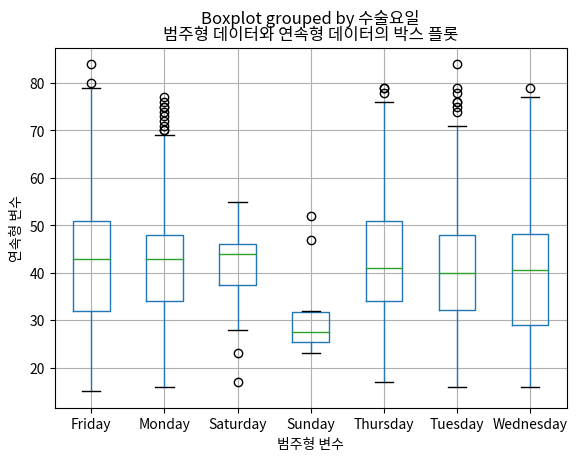

In [ ]:
# 박스 플롯 그리기
merge.boxplot(column='연령', by='수술요일')
plt.xlabel('범주형 변수')
plt.ylabel('연속형 변수')
plt.title('범주형 데이터와 연속형 데이터의 박스 플롯')

plt.show()

In [ ]:
from scipy.stats import chi2_contingency

# 교차표 생성
cross_table = pd.crosstab(merge['수술요일'], merge['직업'])

# 카이제곱 검정 수행
chi2, p, dof, expected = chi2_contingency(cross_table)

print("카이제곱 통계량:", chi2)
print("p-value:", p)
print("자유도:", dof)
print("예상 빈도표:\n", expected)

카이제곱 통계량: 105.67386946819856
p-value: 0.381799918834958
자유도: 102
예상 빈도표:
 [[4.18108883e+00 1.22819484e+01 6.79426934e+00 2.19507163e+01
  1.00084814e+02 1.09753582e+01 9.93008596e+00 3.89363897e+01
  1.08185673e+02 9.14613181e+00 2.61318052e+00 3.65845272e+00
  1.17593123e+01 9.14613181e+00 4.20722063e+01 2.79610315e+01
  5.74899713e+00 3.05742120e+01]
 [2.45730659e+00 7.21833811e+00 3.99312321e+00 1.29008596e+01
  5.88217765e+01 6.45042980e+00 5.83610315e+00 2.28836676e+01
  6.35828080e+01 5.37535817e+00 1.53581662e+00 2.15014327e+00
  6.91117479e+00 5.37535817e+00 2.47266476e+01 1.64332378e+01
  3.37879656e+00 1.79690544e+01]
 [1.65042980e-01 4.84813754e-01 2.68194842e-01 8.66475645e-01
  3.95071633e+00 4.33237822e-01 3.91977077e-01 1.53696275e+00
  4.27048711e+00 3.61031519e-01 1.03151862e-01 1.44412607e-01
  4.64183381e-01 3.61031519e-01 1.66074499e+00 1.10372493e+00
  2.26934097e-01 1.20687679e+00]
 [9.16905444e-02 2.69340974e-01 1.48997135e-01 4.81375358e-01
  2.19484241e+00 2.40

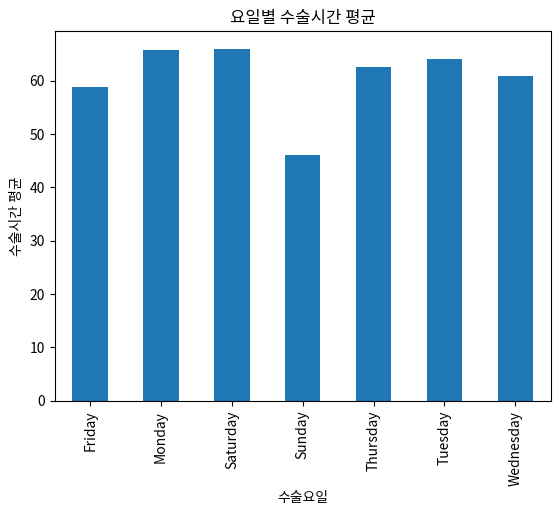

In [ ]:
# 요일별 수술시간 평균 계산
avg_surgery_time = merge.groupby('요일')['수술시간'].mean()

# 막대 그래프 그리기
avg_surgery_time.plot(kind='bar')
plt.xlabel('수술요일')
plt.ylabel('수술시간 평균')
plt.title('요일별 수술시간 평균')

plt.show()

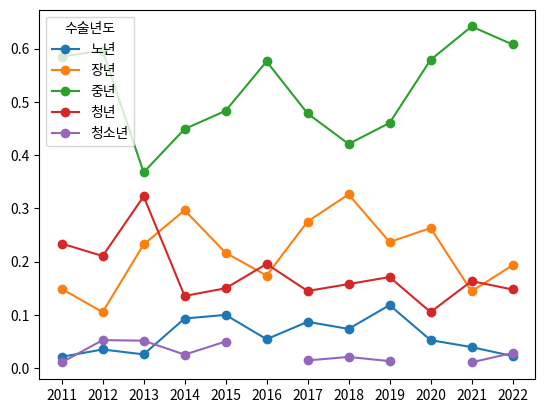

In [ ]:
# 연령대별 수술 요일 선호도 계산
preference_counts = merge.groupby(['수술년도', '성별']).size().unstack()
year_group_counts = merge['수술년도'].value_counts()

# 비율로 변환
preference_ratios = preference_counts.div(year_group_counts, axis=0)

# 선 그래프 그리기
preference_ratios.plot(kind='line', marker='o')

plt.xticks(range(len(preference_ratios.index)), preference_ratios.index)  # X 축 레이블 설정
plt.legend(title='수술년도', loc='upper left')

plt.show()

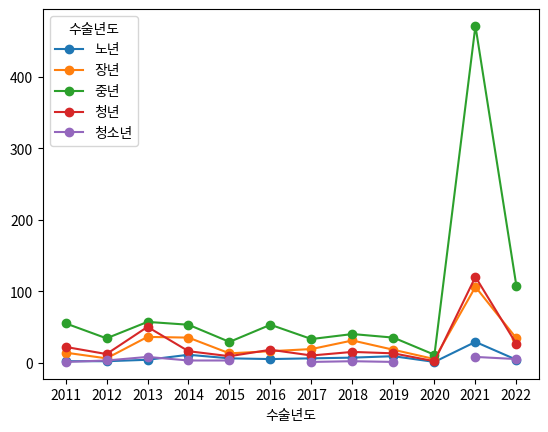

In [ ]:
# 연령대별 수술 요일 선호도 계산
preference_counts = merge.groupby(['수술년도', '연령대']).size().unstack()
year_group_counts = merge['수술년도'].value_counts()


# 선 그래프 그리기
preference_counts.plot(kind='line', marker='o')

plt.xticks(range(len(preference_counts.index)), preference_counts.index)  # X 축 레이블 설정
plt.legend(title='수술년도', loc='upper left')

plt.show()

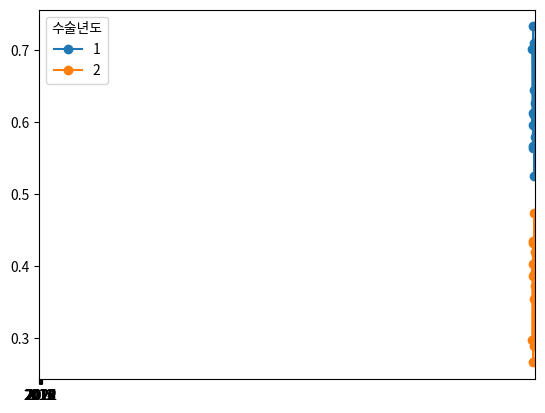

In [ ]:
# 연령대별 수술 요일 선호도 계산
preference_counts = merge.groupby(['수술년도', '성별']).size().unstack()
year_group_counts = merge['수술년도'].value_counts()

# 비율로 변환
preference_ratios = preference_counts.div(year_group_counts, axis=0)

# 선 그래프 그리기
preference_ratios.plot(kind='line', marker='o')

plt.xticks(range(len(preference_ratios.index)), preference_ratios.index)  # X 축 레이블 설정
plt.legend(title='수술년도', loc='upper left')

plt.show()

In [ ]:
merge[merge['직업']=='기타']['수술일자']

2       2011-05-09
21      2021-01-11
22      2021-01-18
23      2021-01-18
26      2021-01-18
           ...    
1881    2021-01-02
1885    2021-01-02
1888    2021-01-02
1891    2021-01-02
1893    2021-01-02
Name: 수술일자, Length: 383, dtype: object

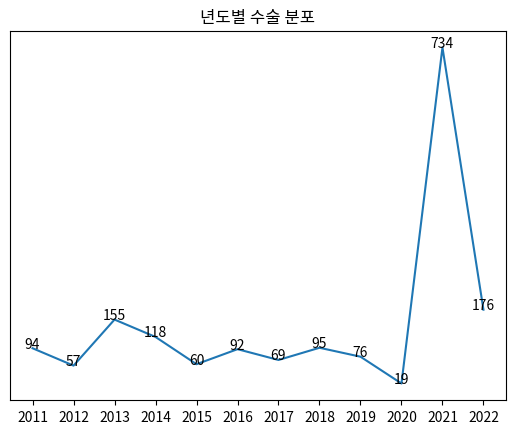

In [ ]:
# 요일별 수술 수 계산
year_counts = merge['수술년도'].value_counts()

# 요일명 순서 정의
year_order = [str(x)for x in range(2011,2023)]

# 차트 그리기
plt.plot(year_order, year_counts.loc[year_order])
plt.title('년도별 수술 분포')

# 수치 나타내기
for i, count in enumerate(year_counts.loc[year_order]):
    plt.text(i, count + 0.5, str(count), ha='center')

plt.yticks([])  # y축 숨기기
plt.show()

In [ ]:
merge[merge['직업']=='기타']['수술년도'].value_counts()
# 20-21년 기타가 5->241 로 급증
# 왜?
# 21년도 부터 무직은 기타로 소속됨 + 2021년 전체적으로 급증

2021    241
2022     52
2013     36
2011     21
2012     13
2014      9
2020      5
2016      3
2019      2
2015      1
Name: 수술년도, dtype: int64

In [ ]:
merge['수술년도']=merge['수술년도'].astype('int64')
merge[merge['직업']=='무직']['수술년도'].value_counts()
# 21년도 부터 무직은 기타로 소속됨

2018    29
2014    23
2017    22
2019    22
2016    21
2015    15
2013    12
2011     3
2012     1
2020     1
Name: 수술년도, dtype: int64

In [ ]:
merge[merge['직업']=='학생']['수술계절'].value_counts()

겨울    45
봄     26
가을    24
여름    22
Name: 수술계절, dtype: int64

In [ ]:
merge.describe()

,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,빈혈여부,...,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추전방위증,최근입원기간,누적입원기간,수술년도
count,1745.000000,1745.000000,1745.000000,1745.000000,1745.000000,1745.000000,1745.000000,1745.000000,1745.000000,1745.000000,...,1745.000000,1745.000000,1745.000000,1745.000000,1745.000000,1745.000000,1745.000000,1745.000000,1745.000000,1745.000000
mean,40.245501,2.315759,7.714613,0.050430,0.020630,0.134670,0.306590,0.065330,0.004011,0.024069,...,16.091748,15.528447,0.056160,43.862676,1989.730802,4.054441,0.032092,2.620630,51.146132,2018.194842
std,12.549036,0.998570,14.310368,0.218893,0.142184,0.341469,0.637591,0.247177,0.063227,0.153307,...,8.248577,10.385688,0.230297,50.485978,315.909314,0.508995,0.176294,2.848714,60.968426,3.624091
min,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-6.300000,-27.400000,0.000000,-2.820000,1145.800000,1.000000,0.000000,0.000000,0.000000,2011.000000
25%,31.800000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.400000,9.200000,0.000000,-1.580000,1778.100000,4.000000,0.000000,1.000000,30.000000,2015.000000
50%,40.400000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,15.500000,14.600000,0.000000,-0.970000,1990.000000,4.000000,0.000000,2.000000,30.000000,2021.000000
75%,49.100000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,21.300000,21.100000,0.000000,100.000000,2178.500000,4.000000,0.000000,3.000000,60.000000,2021.000000
max,89.000000,5.000000,68.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,...,48.700000,165.000000,1.000000,100.000000,3214.200000,5.000000,1.000000,50.000000,1530.000000,2022.000000


In [ ]:
merge[merge['수술년도']<2021]['최근입원기간'].value_counts()

2     297
1     270
3      68
4      58
0      40
5      24
7      14
8      12
6      10
11      8
9       7
12      5
10      5
22      2
13      2
14      2
15      2
50      2
16      2
45      1
18      1
17      1
29      1
19      1
Name: 최근입원기간, dtype: int64

In [ ]:
merge[(merge['수술년도']>=2021)&(merge['최근입원기간']<4)]

# 문제정의라....
# 

,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,빈혈여부,...,디스크위치,척추이동척도,척추전방위증,최근입원기간,누적입원기간,연령대,BMI,수술계절,요일,수술년도
18,31.5,4,14.0,0.0,0,0,0,0,0,0,...,4,Middle,0,3,60,장년,정상,겨울,Monday,2021
19,31.8,2,0.0,0.0,0,0,1,0,0,0,...,4,Down,0,1,30,중년,저체중,겨울,Monday,2021
20,44.3,2,0.0,0.0,0,0,0,0,0,0,...,4,Middle,0,2,60,청년,정상,겨울,Monday,2021
22,34.7,2,0.0,0.0,0,0,0,0,0,0,...,4,Middle,0,3,30,노년,정상,겨울,Monday,2021
24,38.9,4,0.0,0.0,0,0,2,0,0,0,...,4,Middle,1,3,30,중년,정상,겨울,Monday,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1887,36.1,3,42.0,0.0,0,0,1,0,0,0,...,4,Middle,0,3,30,중년,정상,겨울,Saturday,2021
1888,46.8,1,29.0,0.0,0,1,0,0,0,0,...,4,Middle,0,3,60,중년,정상,겨울,Saturday,2021
1891,24.9,1,0.0,0.0,0,1,0,0,0,0,...,4,Middle,1,2,30,중년,정상,겨울,Saturday,2021
1892,45.8,4,0.0,0.0,0,0,0,0,0,0,...,4,Middle,0,2,30,중년,저체중,겨울,Saturday,2021


In [ ]:
merge['누적입원기간'].value_counts()

30      1043
60       460
90       174
120       34
150        6
240        5
180        4
0          3
330        3
210        3
510        2
270        1
540        1
1320       1
450        1
390        1
360        1
1530       1
300        1
Name: 누적입원기간, dtype: int64

In [ ]:
merge[merge['최근입원기간']==0]['수술기법'].value_counts()

TELD    38
IELD     2
Name: 수술기법, dtype: int64

In [ ]:
merge['직업'].value_counts()
# 사무직, 학생 , 공무원

사무직      414
기타       383
자영업      161
무직       149
학생       117
주부       107
군인        84
공무원       47
운수업       45
노동직       42
농업        38
의료직       35
사업가       35
교사        26
특수전문직     22
건설업       16
운동선수      14
예술가       10
Name: 직업, dtype: int64